Final weights: [0.28390688 0.08823741 1.01440392]


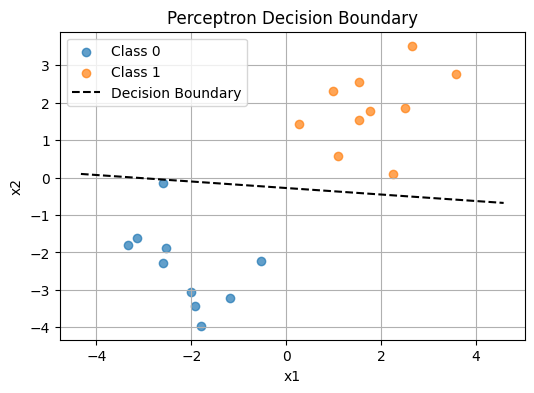

In [3]:
#7)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("A5_P1.csv")
X = X = data[['X1', 'X2']].values # features
y = data['y'].values       # labels: 0 or 1

# Convert labels: 0 -> -1 for Perceptron
y = np.where(y == 0, -1, 1)

# Parameters
lr = 0.01
epochs = 20
np.random.seed()  # random seed for different initializations

# Random weight initialization (2 features + bias)
w = np.random.randn(3)

# Add bias term to input
X_bias = np.c_[np.ones(X.shape[0]), X]  # shape: (n_samples, 3)

# Step activation function
def step(z):
    return np.where(z >= 0, 1, -1)

# Store weights over iterations for decision boundary (optional)
weight_history = [w.copy()]

# Training
for epoch in range(epochs):
    for i in range(len(X)):
        z = np.dot(w, X_bias[i])
        y_pred = step(z)
        w += lr * (y[i] - y_pred) * X_bias[i]
    weight_history.append(w.copy())

# Final weights
print("Final weights:", w)

# Plotting
plt.figure(figsize=(6,4))
for label in np.unique(y):
    plt.scatter(X[y == label, 0], X[y == label, 1],
                label=f"Class {1 if label == 1 else 0}", alpha=0.7)

# Decision boundary: w0 + w1*x + w2*y = 0 => y = -(w0 + w1*x) / w2
x_vals = np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 100)
y_vals = -(w[0] + w[1]*x_vals) / w[2]
plt.plot(x_vals, y_vals, 'k--', label='Decision Boundary')

plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Perceptron Decision Boundary')
plt.legend()
plt.grid(True)
plt.show()


Epoch 0 | Train Loss: 0.1722 | Test Loss: 0.1606 | Train Acc: 0.5917 | Test Acc: 0.6333
Epoch 100 | Train Loss: 0.0100 | Test Loss: 0.0036 | Train Acc: 0.9833 | Test Acc: 1.0000
Epoch 200 | Train Loss: 0.0093 | Test Loss: 0.0022 | Train Acc: 0.9833 | Test Acc: 1.0000
Epoch 300 | Train Loss: 0.0090 | Test Loss: 0.0018 | Train Acc: 0.9833 | Test Acc: 1.0000
Epoch 400 | Train Loss: 0.0086 | Test Loss: 0.0014 | Train Acc: 0.9833 | Test Acc: 1.0000
Epoch 500 | Train Loss: 0.0082 | Test Loss: 0.0011 | Train Acc: 0.9833 | Test Acc: 1.0000
Epoch 600 | Train Loss: 0.0078 | Test Loss: 0.0009 | Train Acc: 0.9833 | Test Acc: 1.0000
Epoch 700 | Train Loss: 0.0074 | Test Loss: 0.0008 | Train Acc: 0.9833 | Test Acc: 1.0000
Epoch 800 | Train Loss: 0.0065 | Test Loss: 0.0016 | Train Acc: 0.9917 | Test Acc: 1.0000
Epoch 900 | Train Loss: 0.0052 | Test Loss: 0.0058 | Train Acc: 0.9917 | Test Acc: 1.0000


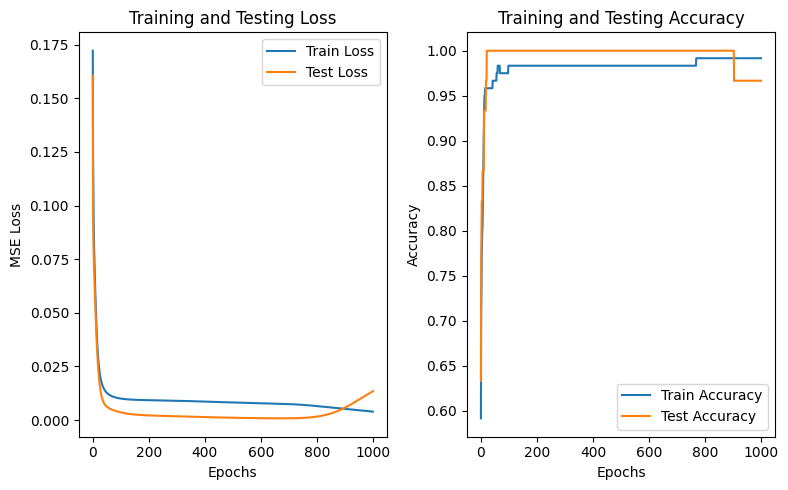

In [6]:
# 8)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Set seed for reproducibility
np.random.seed(42)

# Load and preprocess data
iris = load_iris()
X = iris.data  # shape: (150, 4)
y = iris.target.reshape(-1, 1)  # shape: (150, 1)

# One-hot encode target labels
encoder = OneHotEncoder(sparse_output=False)
y_encoded = encoder.fit_transform(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Activation functions
def tanh(x):
    return np.tanh(x)

def tanh_derivative(x):
    return 1 - np.tanh(x)**2

def softmax(x):
    e_x = np.exp(x - np.max(x, axis=1, keepdims=True))
    return e_x / e_x.sum(axis=1, keepdims=True)

# Loss: Mean Squared Error
def mse_loss(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def mse_derivative(y_true, y_pred):
    return y_pred - y_true

# Network architecture
input_size = X_train.shape[1]    # 4
hidden_size = 5
output_size = y_train.shape[1]   # 3
lr = 0.01
epochs = 1000

# Weight initialization
W1 = np.random.randn(input_size, hidden_size)
b1 = np.zeros((1, hidden_size))
W2 = np.random.randn(hidden_size, output_size)
b2 = np.zeros((1, output_size))

# For plotting
train_losses, test_losses = [], []
train_accuracies, test_accuracies = [], []

# Training loop
for epoch in range(epochs):
    for i in range(len(X_train)):
        x = X_train[i].reshape(1, -1)
        y_true = y_train[i].reshape(1, -1)

        # Forward pass
        z1 = np.dot(x, W1) + b1
        a1 = tanh(z1)
        z2 = np.dot(a1, W2) + b2
        a2 = softmax(z2)

        # Loss and Backward pass
        loss = mse_loss(y_true, a2)
        d_loss = mse_derivative(y_true, a2)

        dz2 = d_loss  # shape (1, 3)
        dW2 = np.dot(a1.T, dz2)
        db2 = dz2

        dz1 = np.dot(dz2, W2.T) * tanh_derivative(z1)
        dW1 = np.dot(x.T, dz1)
        db1 = dz1

        # Update weights
        W2 -= lr * dW2
        b2 -= lr * db2
        W1 -= lr * dW1
        b1 -= lr * db1

    # Evaluate loss & accuracy for plotting
    def evaluate(X, Y):
        z1 = np.dot(X, W1) + b1
        a1 = tanh(z1)
        z2 = np.dot(a1, W2) + b2
        a2 = softmax(z2)
        loss = mse_loss(Y, a2)
        accuracy = np.mean(np.argmax(a2, axis=1) == np.argmax(Y, axis=1))
        return loss, accuracy

    train_loss, train_acc = evaluate(X_train, y_train)
    test_loss, test_acc = evaluate(X_test, y_test)

    train_losses.append(train_loss)
    test_losses.append(test_loss)
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

    if epoch % 100 == 0:
        print(f"Epoch {epoch} | Train Loss: {train_loss:.4f} | Test Loss: {test_loss:.4f} | Train Acc: {train_acc:.4f} | Test Acc: {test_acc:.4f}")

# Plotting Loss
plt.figure(figsize=(8, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.title('Training and Testing Loss')
plt.legend()

# Plotting Accuracy
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(test_accuracies, label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy')
plt.legend()

plt.tight_layout()
plt.show()
